# POM-1-LOGISTIC REG
# NAME - AKSHAT SHRIVASTAVA
# ROLL-NO 2305591
# SECTION - CSE-35


Columns in dataset: Index(['Age', 'Income', 'Buy'], dtype='object')

Accuracy: 0.8333333333333334


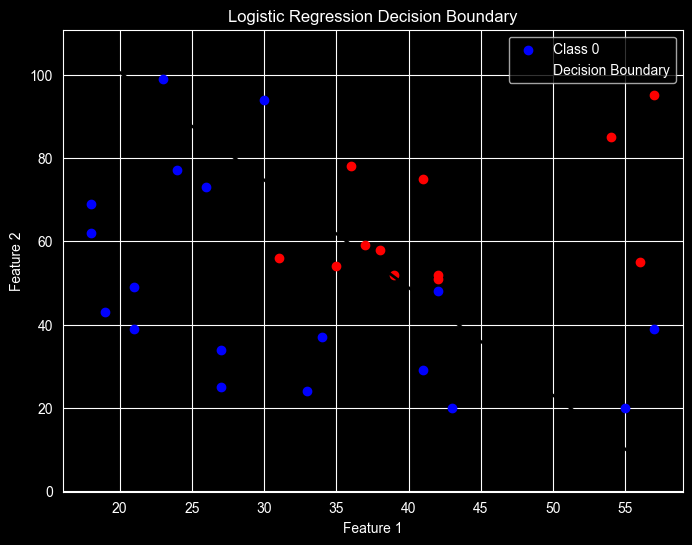

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("logistic_regression_dataset.csv")
df.columns = df.columns.str.strip()

print("\nColumns in dataset:", df.columns)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


if y.dtype == object:
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))


plt.figure(figsize=(8,6))


for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i,0], X[i,1], color='blue', label="Class 0" if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color='red', label="Class 1" if i==0 else "")


x_values = np.linspace(min(X[:,0]), max(X[:,0]), 200)
coef = model.coef_[0]
intercept = model.intercept_[0]

y_values = -(coef[0]*x_values + intercept) / coef[1]

plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)

plt.savefig("logistic_regression_graph.png", dpi=300)
plt.show()
